In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks/Paper

/content/drive/My Drive/Colab Notebooks/Paper


In [1]:
import pandas as pd
import numpy as np
import glob, os, cv2
import matplotlib.pyplot as plt
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator,save_img

In [2]:
from tensorflow.keras.datasets import cifar100

In [3]:
(x_train , y_train ), (x_test,y_test) = cifar100.load_data(label_mode='fine')

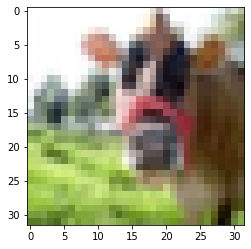

In [ ]:
plt.imshow(x_train[0])

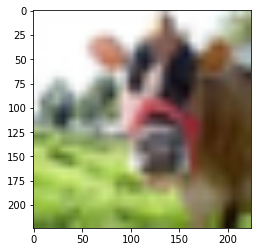

In [ ]:
plt.imshow(cv2.resize(x_train[0],(224,224)))

In [ ]:
CIFAR100_LABELS_LIST[y_train[0][0]]

NameError: ignored

In [4]:
# cifar100 label list는 아래와 같음.

CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [ ]:
# dictionary를 안 만들어도됨. 참고
# cifar_dict = {}
# for i,j in enumerate(CIFAR100_LABELS_LIST):
#     cifar_dict[i]=j

In [5]:
# make the class folder

for i in CIFAR100_LABELS_LIST:
    os.makedirs(os.path.join(os.getcwd(),'cifar/images',i), exist_ok=True)
for i in CIFAR100_LABELS_LIST:
    os.makedirs(os.path.join(os.getcwd(),'cifar/test',i), exist_ok=True)

In [6]:
# train images generator
for i in range(len(x_train)):
    for j in CIFAR100_LABELS_LIST:
        if CIFAR100_LABELS_LIST[y_train[i][0]] == j :
            save_img(os.path.join(os.getcwd(),'cifar/images','%s/%05d.png'%(j,i+1) ), x_train[i])

In [7]:
# test images generator
for i in range(len(x_test)):
    for j in CIFAR100_LABELS_LIST:
        if CIFAR100_LABELS_LIST[y_test[i][0]] == j :
            save_img(os.path.join(os.getcwd(),'cifar/test','%s/%05d.png'%(j,i+1) ), x_test[i])

In [8]:
all = './cifar/images'
train = './cifar/train'
valid = './cifar/valid'

In [9]:
# 데이터 쪼개기

def split_dataset_into_test_and_train_sets(all_data_dir, training_data_dir, testing_data_dir, testing_data_pct):
    # Recreate testing and training directories
    if testing_data_dir.count('/') > 1:
        shutil.rmtree(testing_data_dir, ignore_errors=False)
        os.makedirs(testing_data_dir)
        print("Successfully cleaned directory " + testing_data_dir)
    else:
        print("Refusing to delete testing data directory " + testing_data_dir + " as we prevent you from doing stupid things!")

    if training_data_dir.count('/') > 1:
        shutil.rmtree(training_data_dir, ignore_errors=False)
        os.makedirs(training_data_dir)
        print("Successfully cleaned directory " + training_data_dir)
    else:
        print("Refusing to delete testing data directory " + training_data_dir + " as we prevent you from doing stupid things!")

    num_training_files = 0
    num_testing_files = 0

    for subdir, dirs, files in os.walk(all_data_dir):
        category_name = os.path.basename(subdir)

        # Don't create a subdirectory for the root directory
        print(category_name + " vs " + os.path.basename(all_data_dir))
        if category_name == os.path.basename(all_data_dir):
            continue

        training_data_category_dir = training_data_dir + '/' + category_name
        testing_data_category_dir = testing_data_dir + '/' + category_name

        if not os.path.exists(training_data_category_dir):
            os.mkdir(training_data_category_dir)

        if not os.path.exists(testing_data_category_dir):
            os.mkdir(testing_data_category_dir)

        for file in files:
            input_file = os.path.join(subdir, file)
            if np.random.rand(1) < testing_data_pct:
                shutil.copy(input_file, testing_data_dir + '/' + category_name + '/' + file)
                num_testing_files += 1
            else:
                shutil.copy(input_file, training_data_dir + '/' + category_name + '/' + file)
                num_training_files += 1

    print("Processed " + str(num_training_files) + " training files.")
    print("Processed " + str(num_testing_files) + " testing files.")

In [10]:
split_dataset_into_test_and_train_sets(all, train, valid, 0.2)

Successfully cleaned directory ./cifar/valid
Successfully cleaned directory ./cifar/train
images vs images
apple vs images
aquarium_fish vs images
baby vs images
bear vs images
beaver vs images
bed vs images
bee vs images
beetle vs images
bicycle vs images
bottle vs images
bowl vs images
boy vs images
bridge vs images
bus vs images
butterfly vs images
camel vs images
can vs images
castle vs images
caterpillar vs images
cattle vs images
chair vs images
chimpanzee vs images
clock vs images
cloud vs images
cockroach vs images
couch vs images
crab vs images
crocodile vs images
cup vs images
dinosaur vs images
dolphin vs images
elephant vs images
flatfish vs images
forest vs images
fox vs images
girl vs images
hamster vs images
house vs images
kangaroo vs images
keyboard vs images
lamp vs images
lawn_mower vs images
leopard vs images
lion vs images
lizard vs images
lobster vs images
man vs images
maple_tree vs images
motorcycle vs images
mountain vs images
mouse vs images
mushroom vs images

In [ ]:
train_img_paths = glob.glob(os.path.join(train, '*/*.ppm')) #ppm 확장자를 root_dir 에 붙여서 인식해라 라는 함수.
train_img_paths[-5:]
valid_img_paths = glob.glob(os.path.join(valid, '*/*.ppm')) #ppm 확장자를 root_dir 에 붙여서 인식해라 라는 함수.
valid_img_paths[-5:]

In [ ]:
X_train_save = X_train.reshape(-1,48*48*3)
X_private_test_save = X_private_test.reshape(-1,48*48*3)
X_public_test_save = X_public_test.reshape(-1,48*48*3)

X_train_save = pd.DataFrame(X_train_save)
X_private_test_save = pd.DataFrame(X_private_test_save)
X_public_test_save = pd.DataFrame(X_public_test_save)

y_train_save = pd.DataFrame(y_train)
y_private_test_save = pd.DataFrame(y_private_test)
y_public_test_save = pd.DataFrame(y_public_test)

# save
X_train_save.to_csv("X_train.csv")
X_private_test_save.to_csv("X_private_test.csv")
X_public_test_save.to_csv("X_public_test.csv")
y_train_save.to_csv("y_train.csv")
y_private_test_save.to_csv("y_private_test.csv")
y_public_test_save.to_csv("y_public_test.csv")